In [1]:
import tensorflow as tf

In [11]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

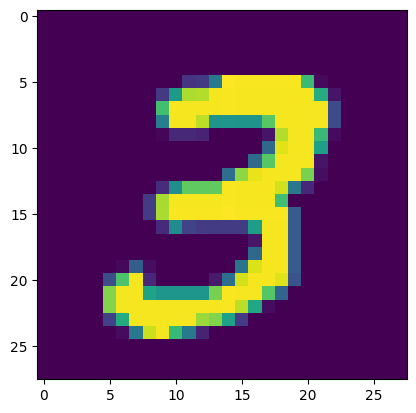

In [7]:
#Let us visualize it
plt.imshow(X_train[7])

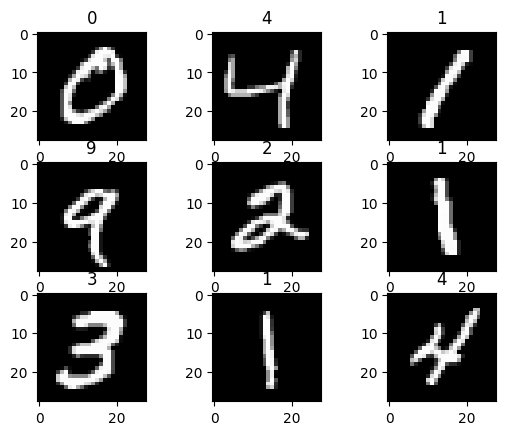

In [8]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(y_train[i])

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10,activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
784*64+64   #parameters = x*w+b = 784*64+64

50240

In [16]:
64*10+10  #for output layer we get input from hidden layer, so 64*10+10

650

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [18]:
history = model.fit(X_train,y_train,epochs=40,batch_size=20)

Epoch 1/40
3000/3000 [==============================] - 5s 1ms/step - loss: 0.3378 - accuracy: 0.9013
Epoch 2/40
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1828 - accuracy: 0.9468
Epoch 3/40
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1440 - accuracy: 0.9565
Epoch 4/40
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1273 - accuracy: 0.9610
Epoch 5/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1144 - accuracy: 0.9647
Epoch 6/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1032 - accuracy: 0.9669
Epoch 7/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0980 - accuracy: 0.9689
Epoch 8/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0926 - accuracy: 0.9704
Epoch 9/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0833 - accuracy: 0.9718
Epoch 10/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.083

In [19]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

313/313 - 0s - loss: 0.1124 - accuracy: 0.9769 - 425ms/epoch - 1ms/step


In [20]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=2)

1875/1875 - 2s - loss: 0.0099 - accuracy: 0.9974 - 2s/epoch - 966us/step


In [22]:
prediction = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


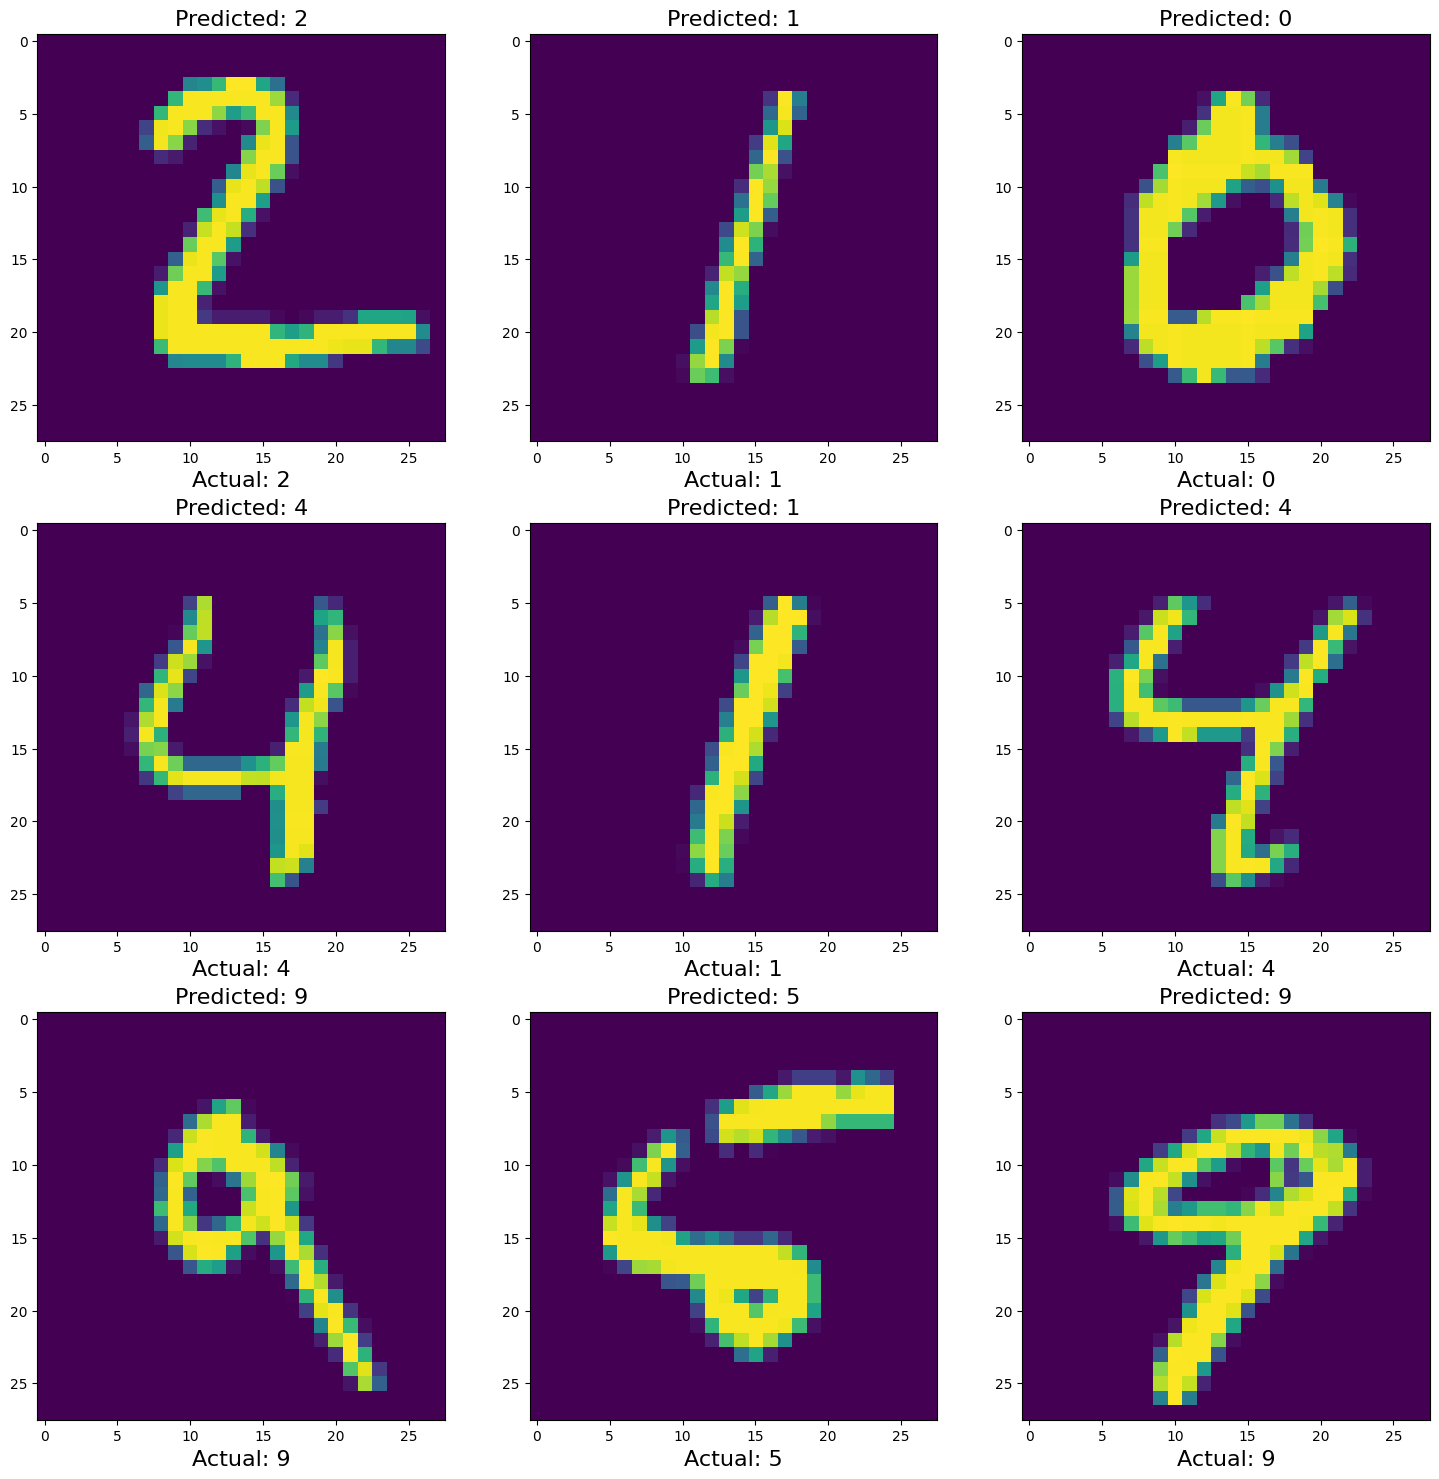

In [23]:
plt.figure(figsize=(18,18))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {np.argmax(prediction[i])}",fontsize=16)
    plt.xlabel(f"Actual: {y_test[i]}",fontsize=16)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_test, np.argmax(prediction,axis=1))

Text(0.5, 1.0, 'Confusion metrics')

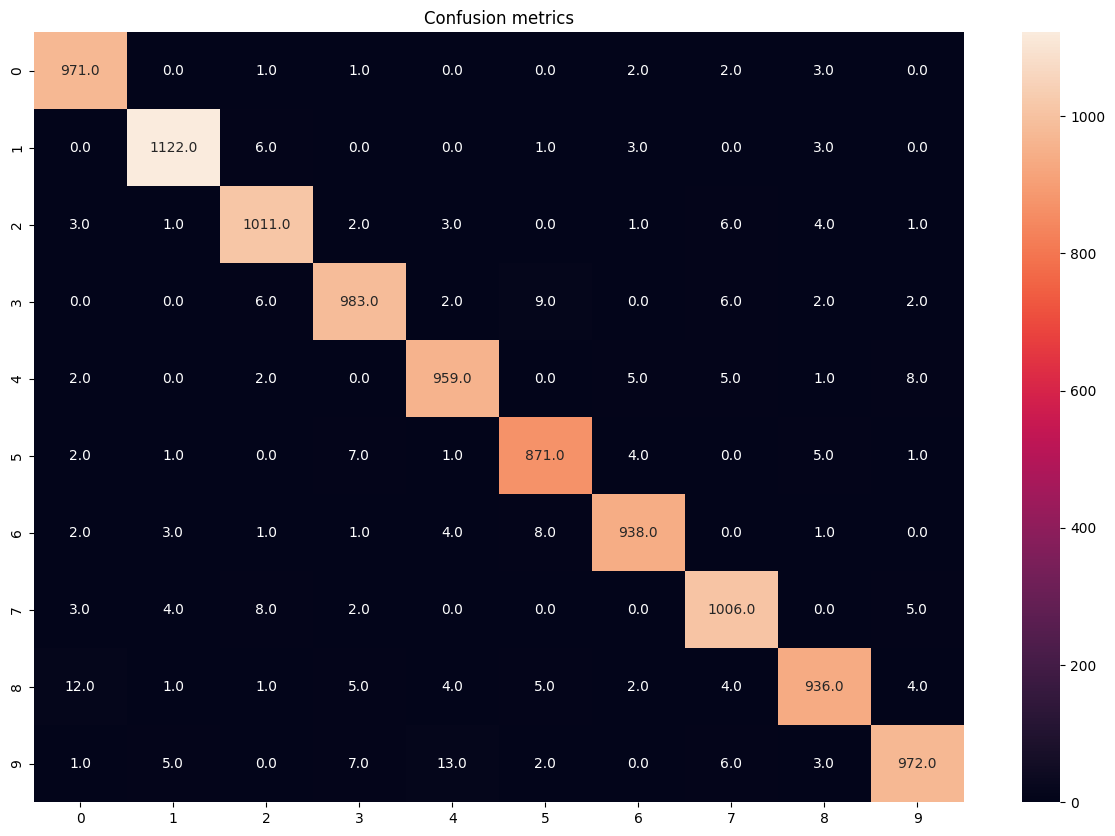

In [26]:
import seaborn

plt.figure(figsize=(15,10))
seaborn.heatmap(cm,annot=True,fmt='.1f')
plt.title("Confusion metrics")